# FRAUD DETECTION ANALYSIS

 Author - Disoj Neupane

In [1]:
#Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

In [2]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from xgboost import plot_importance
import graphviz
from IPython.display import display
import os
import statistics

In [3]:
#using seaborn style
plt.style.use("seaborn")

### Load Dataset

In [4]:
A_R = pd.read_csv("C://Users//disoj//Desktop//Data Science Class//Fraud_Detection_for firms//audit_risk.csv")

In [5]:
A_R.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
#number of observations and features
A_R.shape

(776, 27)

In [7]:
#data types in the dataframe
A_R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

<big>
- Checking for missing values

In [8]:
A_R.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [9]:
A_R['LOCATION_ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0      23
1       6
2       6
3       6
4       6
       ..
771     9
772    16
773    14
774    18
775    15
Name: LOCATION_ID, Length: 776, dtype: object>

In [10]:
# Since I don't need location id anymore for the data analysis, I would like to drop it.
A_R.drop(['LOCATION_ID'],axis=1,inplace=True)

In [11]:
#check for any column has missing values
A_R.isnull().any()

Sector_score      False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [12]:
#check for number of missing values
A_R.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [13]:
A_R.isnull().values.sum()

1

In [14]:
A_R['Money_Value']

0       3.38
1       0.94
2       0.00
3      11.75
4       0.00
       ...  
771     0.00
772     0.00
773     0.00
774     0.00
775     0.32
Name: Money_Value, Length: 776, dtype: float64

In [15]:
mode=statistics.mode(A_R['Money_Value'])
mode

0.0

In [16]:
# Filling missing 'Money_Value' values with mode:
A_R['Money_Value']=A_R['Money_Value'].fillna(A_R['Money_Value'].mode()[0])

In [17]:
#check again for number of missing values
A_R.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [18]:
#basic stats
A_R.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
90%,55.570000,6.315000,0.600000,3.789000,37.460000,0.600000,22.476000,44.700000,5.000000,0.200000,...,0.800000,0.000000,0.200000,0.000000,4.200000,51.809000,1.200000,0.5,15.201400,1.000000
95%,55.570000,9.977500,0.600000,5.986500,61.665000,0.600000,36.999000,70.787500,5.500000,0.400000,...,1.200000,1.000000,0.400000,0.400000,4.400000,73.509500,1.200000,0.5,28.056000,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


## Data Exploratory Analysis
- Univariate Analysis
- Bivariate Analysis - Numeric(TTest)/ Categorical(Chisquare)
- Bivariate Analysis - Visualization
- Variable Reduction - Multicollinearity

## Checking For Outliers:

In [19]:
def boxplot_variables(var):
    
    """Function to plot histogram and boxplots"""
    
    #create 2 subplots for 2 columns
    fig,ax = plt.subplots(ncols=2, sharey= False, figsize = (14,6))
    
    #distribution plots
    sns.distplot(a = A_R[var], hist=True, kde=False, ax = ax[0], color = "green")
    ax[0].set_title("Histogram for {}".format(var))
    ax[0].set_ylabel("Frequency")
    
    #barplots 
    sns.boxplot(x = var,data=A_R,ax=ax[1])
    ax[1].set_title("Boxplot for {}".format(var))
    
    plt.show()

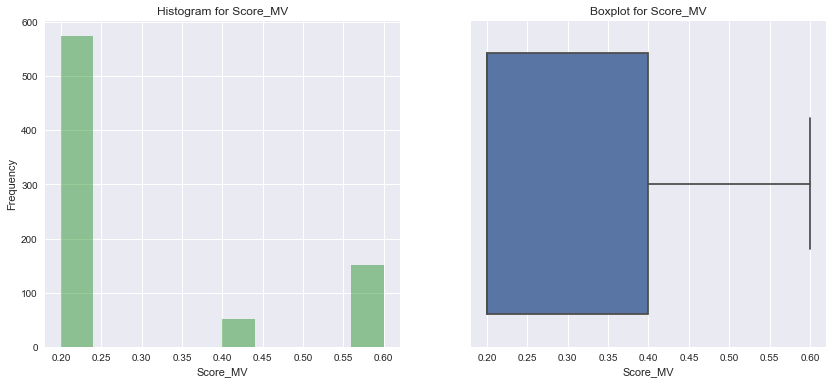

In [20]:
boxplot_variables("Score_MV")

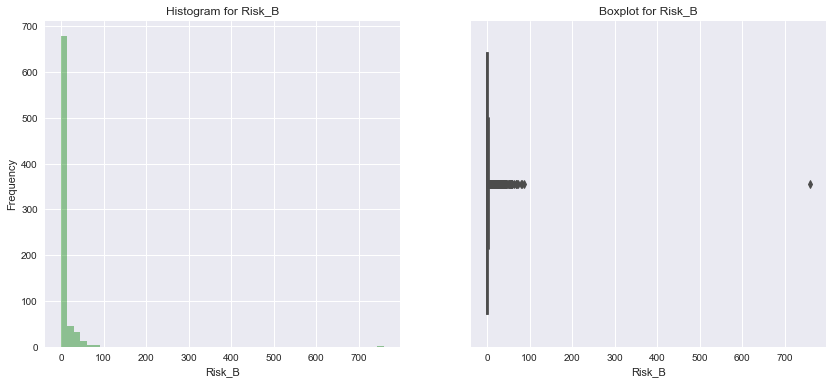

In [21]:
boxplot_variables("Risk_B")

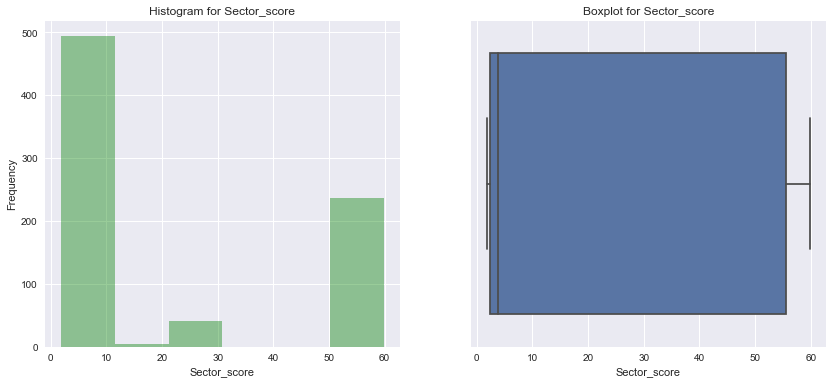

In [22]:
boxplot_variables("Sector_score")

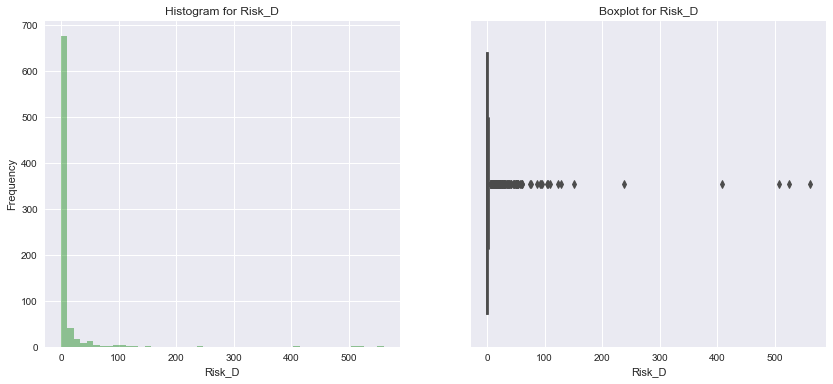

In [23]:
boxplot_variables("Risk_D")

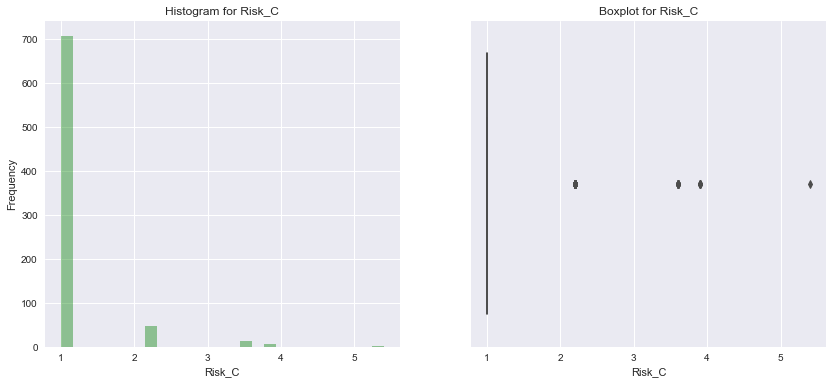

In [24]:
boxplot_variables("Risk_C")

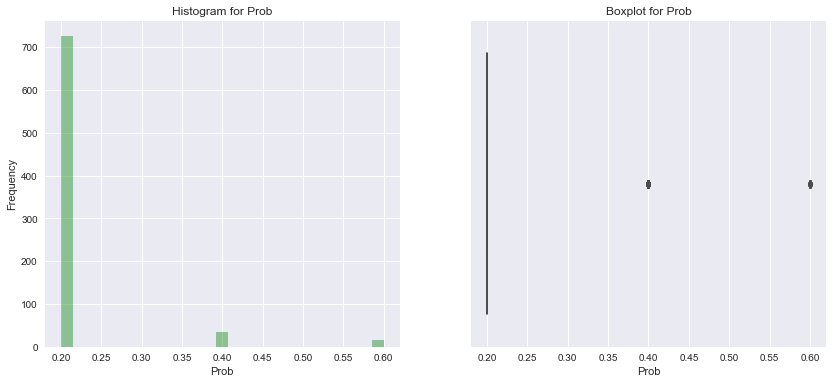

In [25]:
boxplot_variables("Prob")

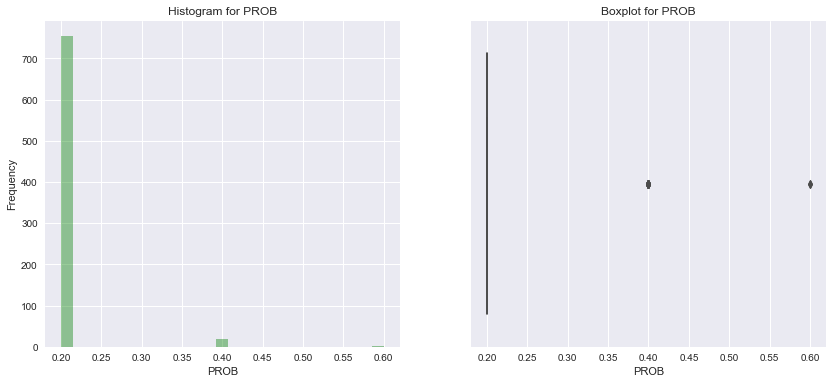

In [26]:
boxplot_variables("PROB")

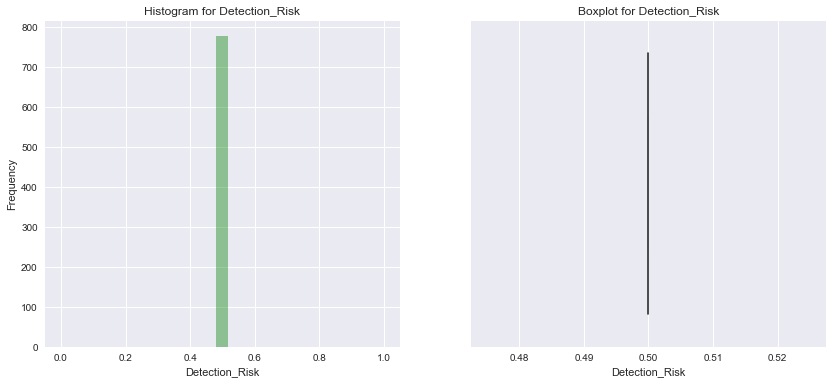

In [27]:
boxplot_variables("Detection_Risk")

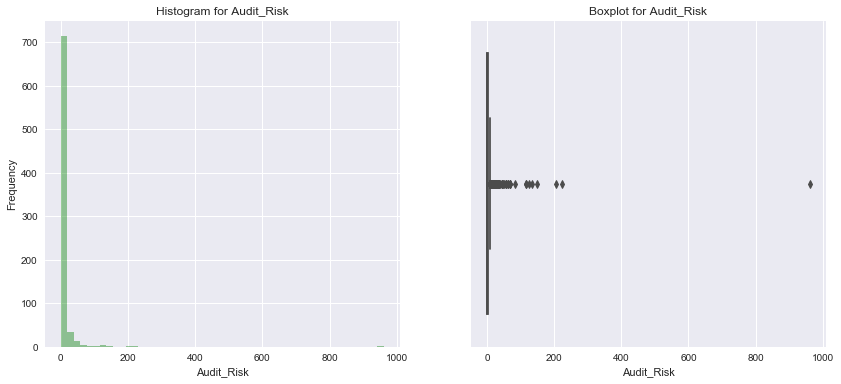

In [28]:
boxplot_variables("Audit_Risk")

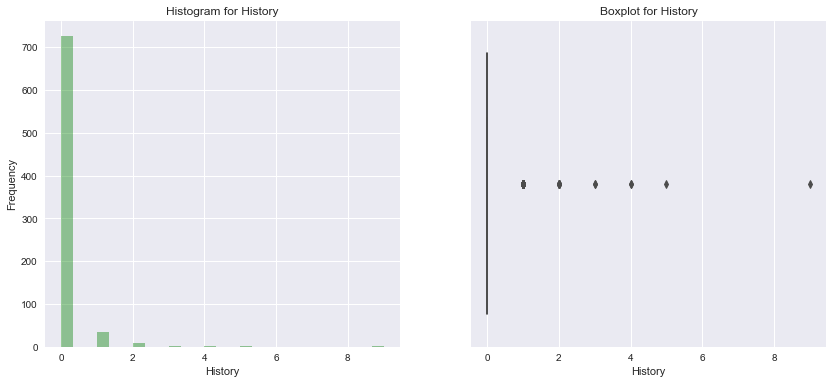

In [29]:
boxplot_variables("History")

## Outlier Capping - Winsorization

In [30]:
def outlier_capping(x):
    
    if x.dtype != "object":
        """A funtion to remove and replace the outliers for numerical columns"""
        x = x.clip_upper(x.quantile(0.95))
        x = x.clip_lower(x.quantile(0.05))

    return(x)

In [31]:
#outlier treatment
A_R = A_R.apply(lambda x: outlier_capping(x))

C:\Users\disoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  """
C:\Users\disoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  


In [32]:
#Distribution of target variable

A_R.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

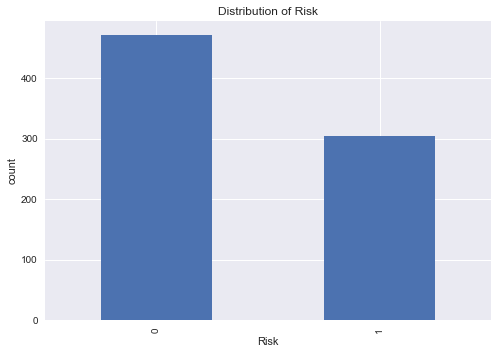

In [33]:
A_R.Risk.value_counts().plot.bar()
plt.xlabel("Risk")
plt.ylabel("count")
plt.title("Distribution of Risk")
plt.show()

In [34]:
#percentage of churners

A_R.Risk.value_counts(normalize=True) * 100

0    60.695876
1    39.304124
Name: Risk, dtype: float64

## Heat Map

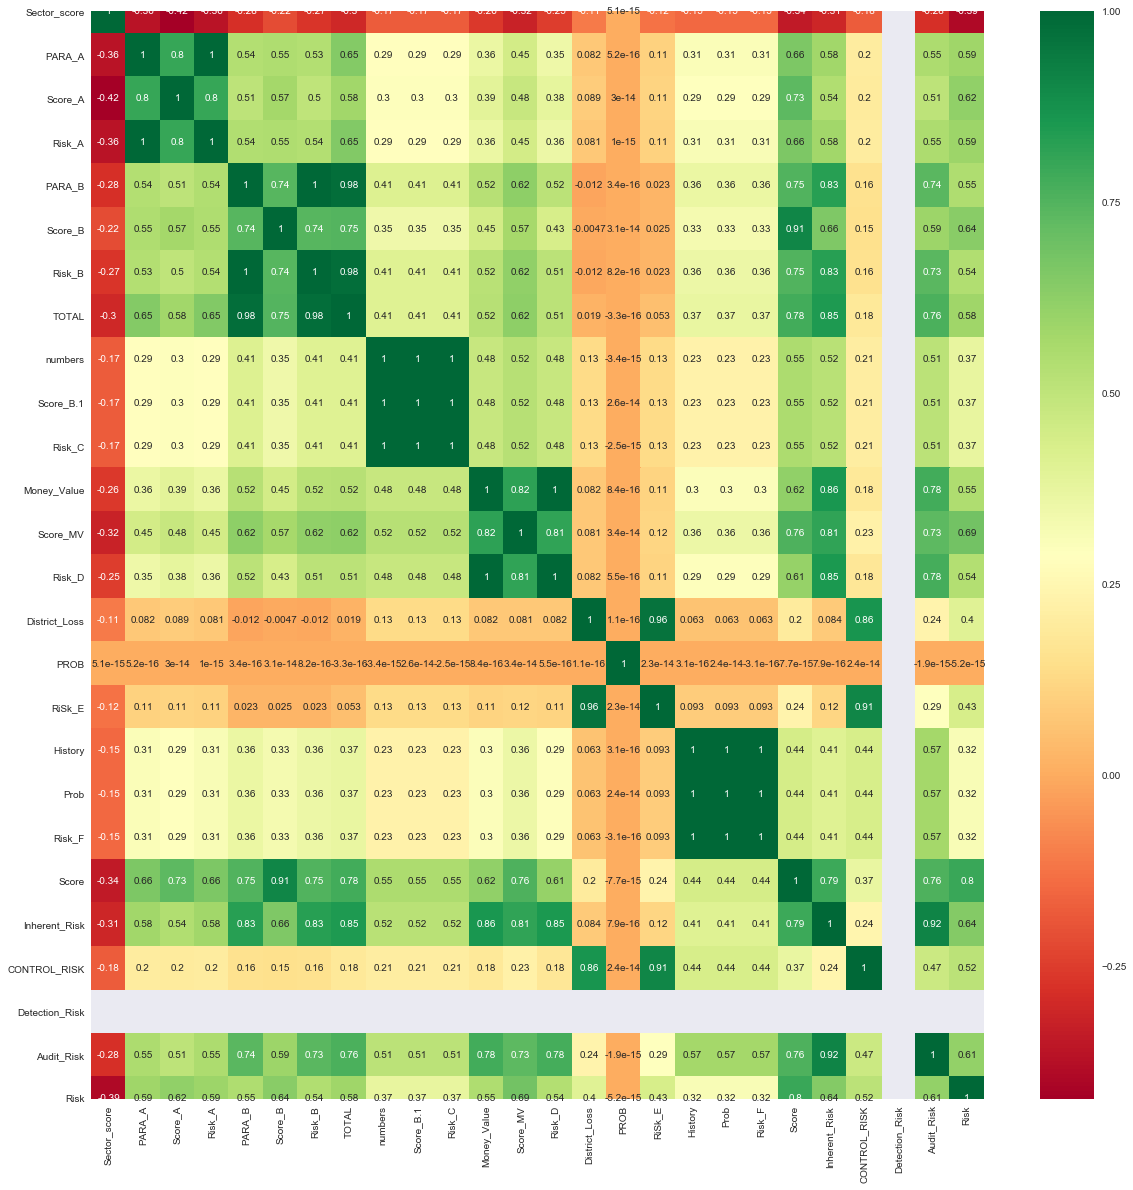

In [35]:
# Lets see the correlation of features with response.
# Generating the correlation heat-map
corrmat=A_R.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap( A_R[top_corr_features].corr(),annot=True,cmap="RdYlGn");

From above heat map, we can see few variables, which are strongly(positive)correlated with response variable 'Risk'; where as few variables have strong multicollinearity among independent variables, which will be removed later on to enhance the performance of the model.

## Feature Selection Processes based on Multicollenearity and p values check:

In [36]:
X_features =A_R.drop(['Risk'],axis=1)
y_actual=A_R['Risk']

In [37]:
X_features

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,5.5,0.4,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880


Removing the features with VIF>5 and p-values>0.05:

In [38]:
def get_vif(X_features):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    l = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]
    return pd.Series(index=X_features.columns,data=l).sort_values(ascending=False)
            
def remove_by_pvalue(X_features,y_actual,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X_features: Array or dataframe excluding predicted variable
        y_actual: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X_features is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X_features.columns)):
        regressor_OLS=sm.OLS(endog=y_actual,exog=X_features).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X_features.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
        
def remove_by_vif(X_features,vif=5):
    """Remove columns from X_features whose VIF is greater than supplied 'vif'
    Parameters:
        X_features:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X_features inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X_features.columns)):
        l = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]
        s=pd.Series(index=X_features.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X_features.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [39]:
get_vif(X_features)

C:\Users\disoj\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\disoj\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


numbers                   inf
Score_B.1                 inf
Risk_F                    inf
Prob                      inf
History                   inf
Risk_C                    inf
PARA_B            1116.535176
Risk_B            1056.870759
Money_Value        551.914009
Risk_D             540.773190
Risk_A             177.318926
PARA_A             176.570728
Score              158.127991
TOTAL               63.142245
Score_B             62.337049
RiSk_E              39.508253
Inherent_Risk       34.871489
CONTROL_RISK        23.944291
Audit_Risk          15.154288
District_Loss       14.887336
Score_MV            10.099548
Score_A              9.986519
Sector_score         1.344269
PROB                 0.003550
Detection_Risk       0.000000
dtype: float64

In [40]:
remove_by_vif(A_R)

Removed:  numbers , VIF:  inf
Removed:  History , VIF:  inf
Removed:  Score_B.1 , VIF:  inf
Removed:  Risk_F , VIF:  inf
Removed:  PARA_B , VIF:  1141.3293934560315
Removed:  Money_Value , VIF:  574.668336818882
Removed:  Risk_A , VIF:  177.6412589945596
Removed:  Score , VIF:  161.37478942828838
Removed:  TOTAL , VIF:  59.29699551768723
Removed:  RiSk_E , VIF:  33.94105358856507
Removed:  Inherent_Risk , VIF:  33.529391698336106
Removed:  CONTROL_RISK , VIF:  11.36713244729001
Removed:  Audit_Risk , VIF:  8.138152294441573


In [41]:
remove_by_pvalue(X_features,y_actual,pvalue=0.05)

Removed:  TOTAL P-value:  0.7694071034572965
Removed:  PARA_A P-value:  0.14475176766722758
Removed:  Score_A P-value:  0.13743972982072908
Removed:  Score_B P-value:  0.25147520279416113
Removed:  District_Loss P-value:  0.125632382092178


In [42]:
A_R_sel=A_R.drop(['PARA_A','Score_A','Score_B','District_Loss'],axis=1)
A_R_sel

,Sector_score,Risk_B,Risk_C,Score_MV,Risk_D,PROB,Prob,Detection_Risk,Risk
0,3.89,0.500,1.0,0.2,0.676,0.2,0.2,0.5,1
1,3.89,0.966,1.0,0.2,0.188,0.2,0.2,0.5,0
2,3.89,0.046,1.0,0.2,0.000,0.2,0.2,0.5,0
3,3.89,6.480,2.2,0.6,7.050,0.2,0.2,0.5,1
4,3.89,0.016,1.0,0.2,0.000,0.2,0.2,0.5,0
...,...,...,...,...,...,...,...,...,...
771,55.57,0.080,1.0,0.2,0.000,0.2,0.2,0.5,0
772,55.57,0.074,1.0,0.2,0.000,0.2,0.2,0.5,0
773,55.57,0.008,1.0,0.2,0.000,0.2,0.2,0.5,0
774,55.57,0.000,1.0,0.2,0.000,0.2,0.2,0.5,0


These are the prominent predictors which are responsible for the Risk analysis.

In [43]:
#Segregating the numeric variable names

var_names = [key for key in dict(A_R_sel.dtypes) if dict(A_R_sel.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
var_names

['Sector_score',
 'Risk_B',
 'Risk_C',
 'Score_MV',
 'Risk_D',
 'PROB',
 'Prob',
 'Detection_Risk',
 'Risk']

## Bi-Variate Analysis
Numeric(TTest)

In [44]:
## performing the independent t test on numerical variables

tstats_df = pd.DataFrame()

for eachvariable in var_names:
        tstats = stats.ttest_ind(A_R_sel.loc[A_R_sel["Risk"] == 1,eachvariable],A_R_sel.loc[A_R_sel["Risk"] == 0, eachvariable],equal_var=False)
        temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
        temp.columns = ['VariableName', 'T-Statistic', 'P-Value']
        tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)

C:\Users\disoj\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\disoj\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\disoj\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [45]:
tstats_df

,VariableName,T-Statistic,P-Value
0,Risk,inf,0
1,Score_MV,21.3804,6.00353e-63
2,Risk_B,14.4591,1.96098e-36
3,Sector_score,-13.1526,8.53512e-36
4,Risk_D,14.206,1.74368e-35
5,Risk_C,9.09002,1.1548e-17
6,Prob,7.48931,7.24968e-13
7,PROB,NaN,NaN
8,Detection_Risk,NaN,NaN


In [46]:
tstat_pred = tstats_df.drop(["T-Statistic","VariableName"], axis = 1)

In [47]:
tstat_pred.index = tstats_df.VariableName

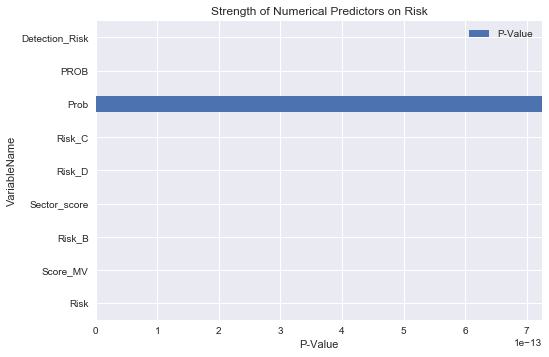

In [48]:
tstat_pred.plot(kind = "barh")
plt.xlabel("P-Value")
plt.title("Strength of Numerical Predictors on Risk")
plt.show()

## Bi-Variate Analysis
BiVariate Box Plots

In [49]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    
    #boxplot
    sns.boxplot(x = 'Risk', y = segment_by, data=A_R_sel)
    plt.title("Box plot of "+segment_by)
    
    plt.show()

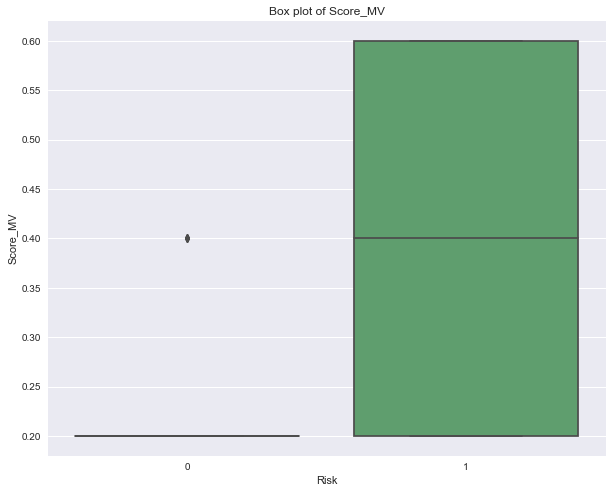

In [50]:
BivariateAnalysisPlot("Score_MV")

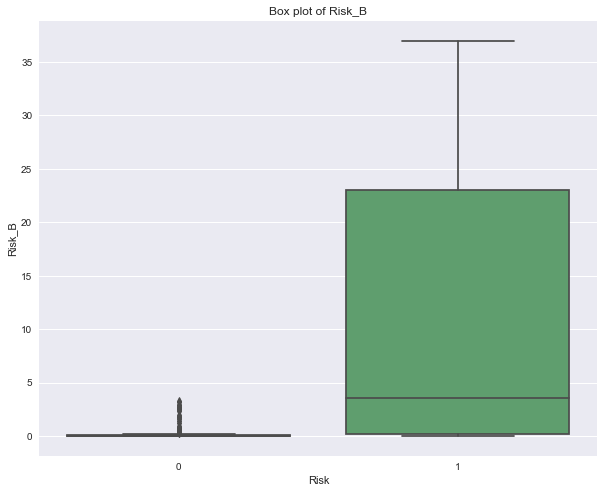

In [51]:
BivariateAnalysisPlot("Risk_B")

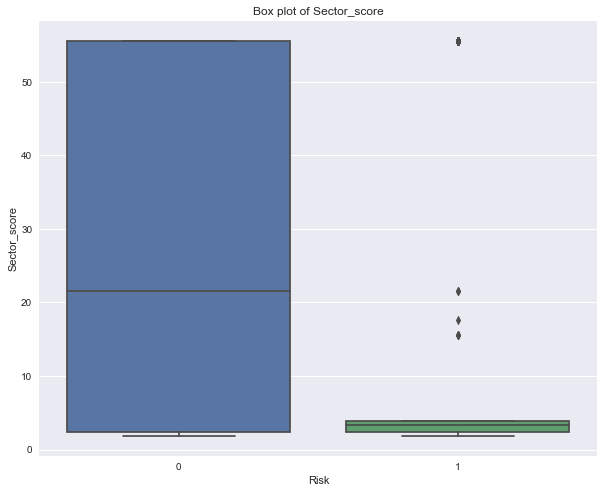

In [52]:
BivariateAnalysisPlot("Sector_score")

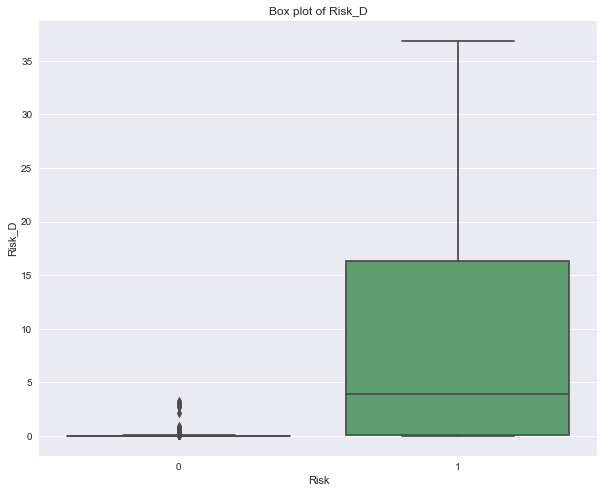

In [53]:
BivariateAnalysisPlot("Risk_D")

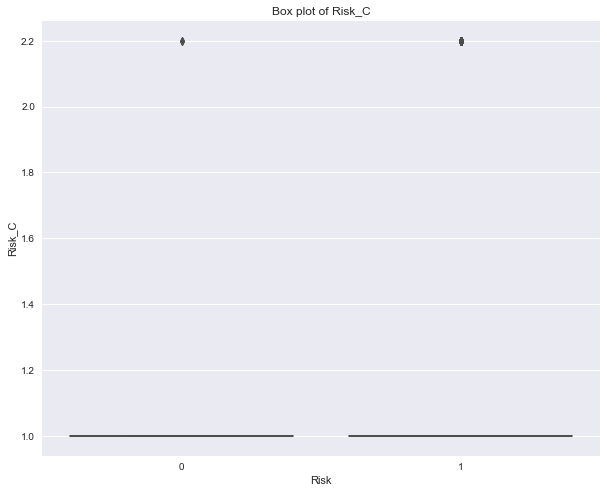

In [54]:
BivariateAnalysisPlot("Risk_C")

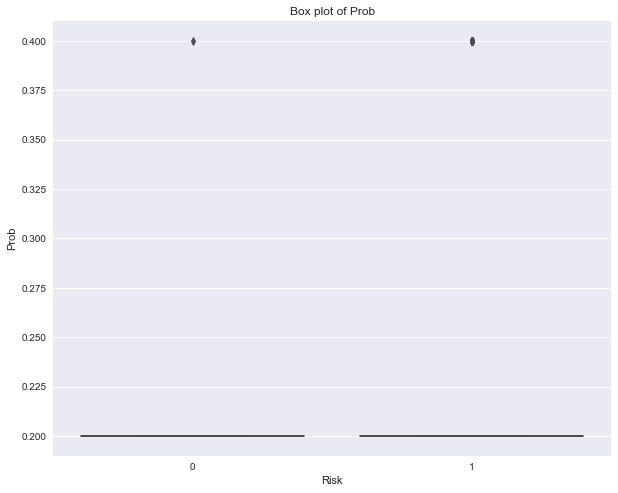

In [55]:
BivariateAnalysisPlot("Prob")

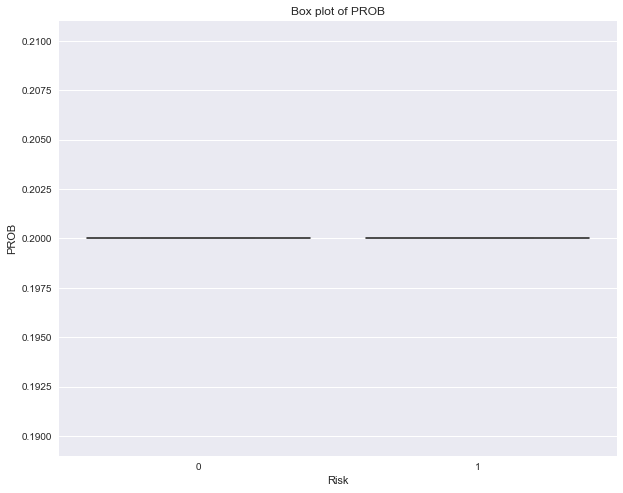

In [56]:
BivariateAnalysisPlot("PROB")

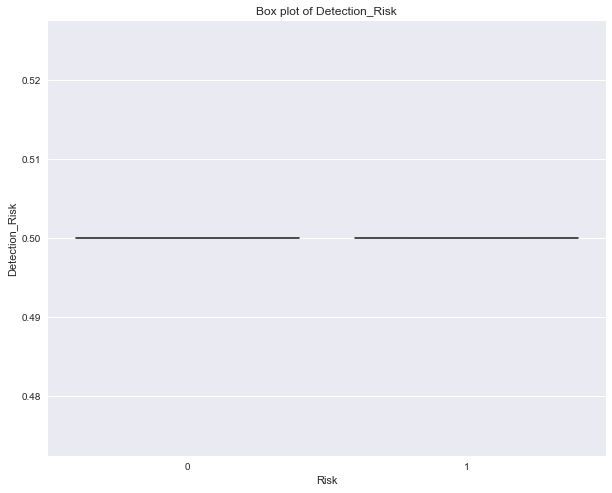

In [57]:
BivariateAnalysisPlot("Detection_Risk")

C:\Users\disoj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\disoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\disoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


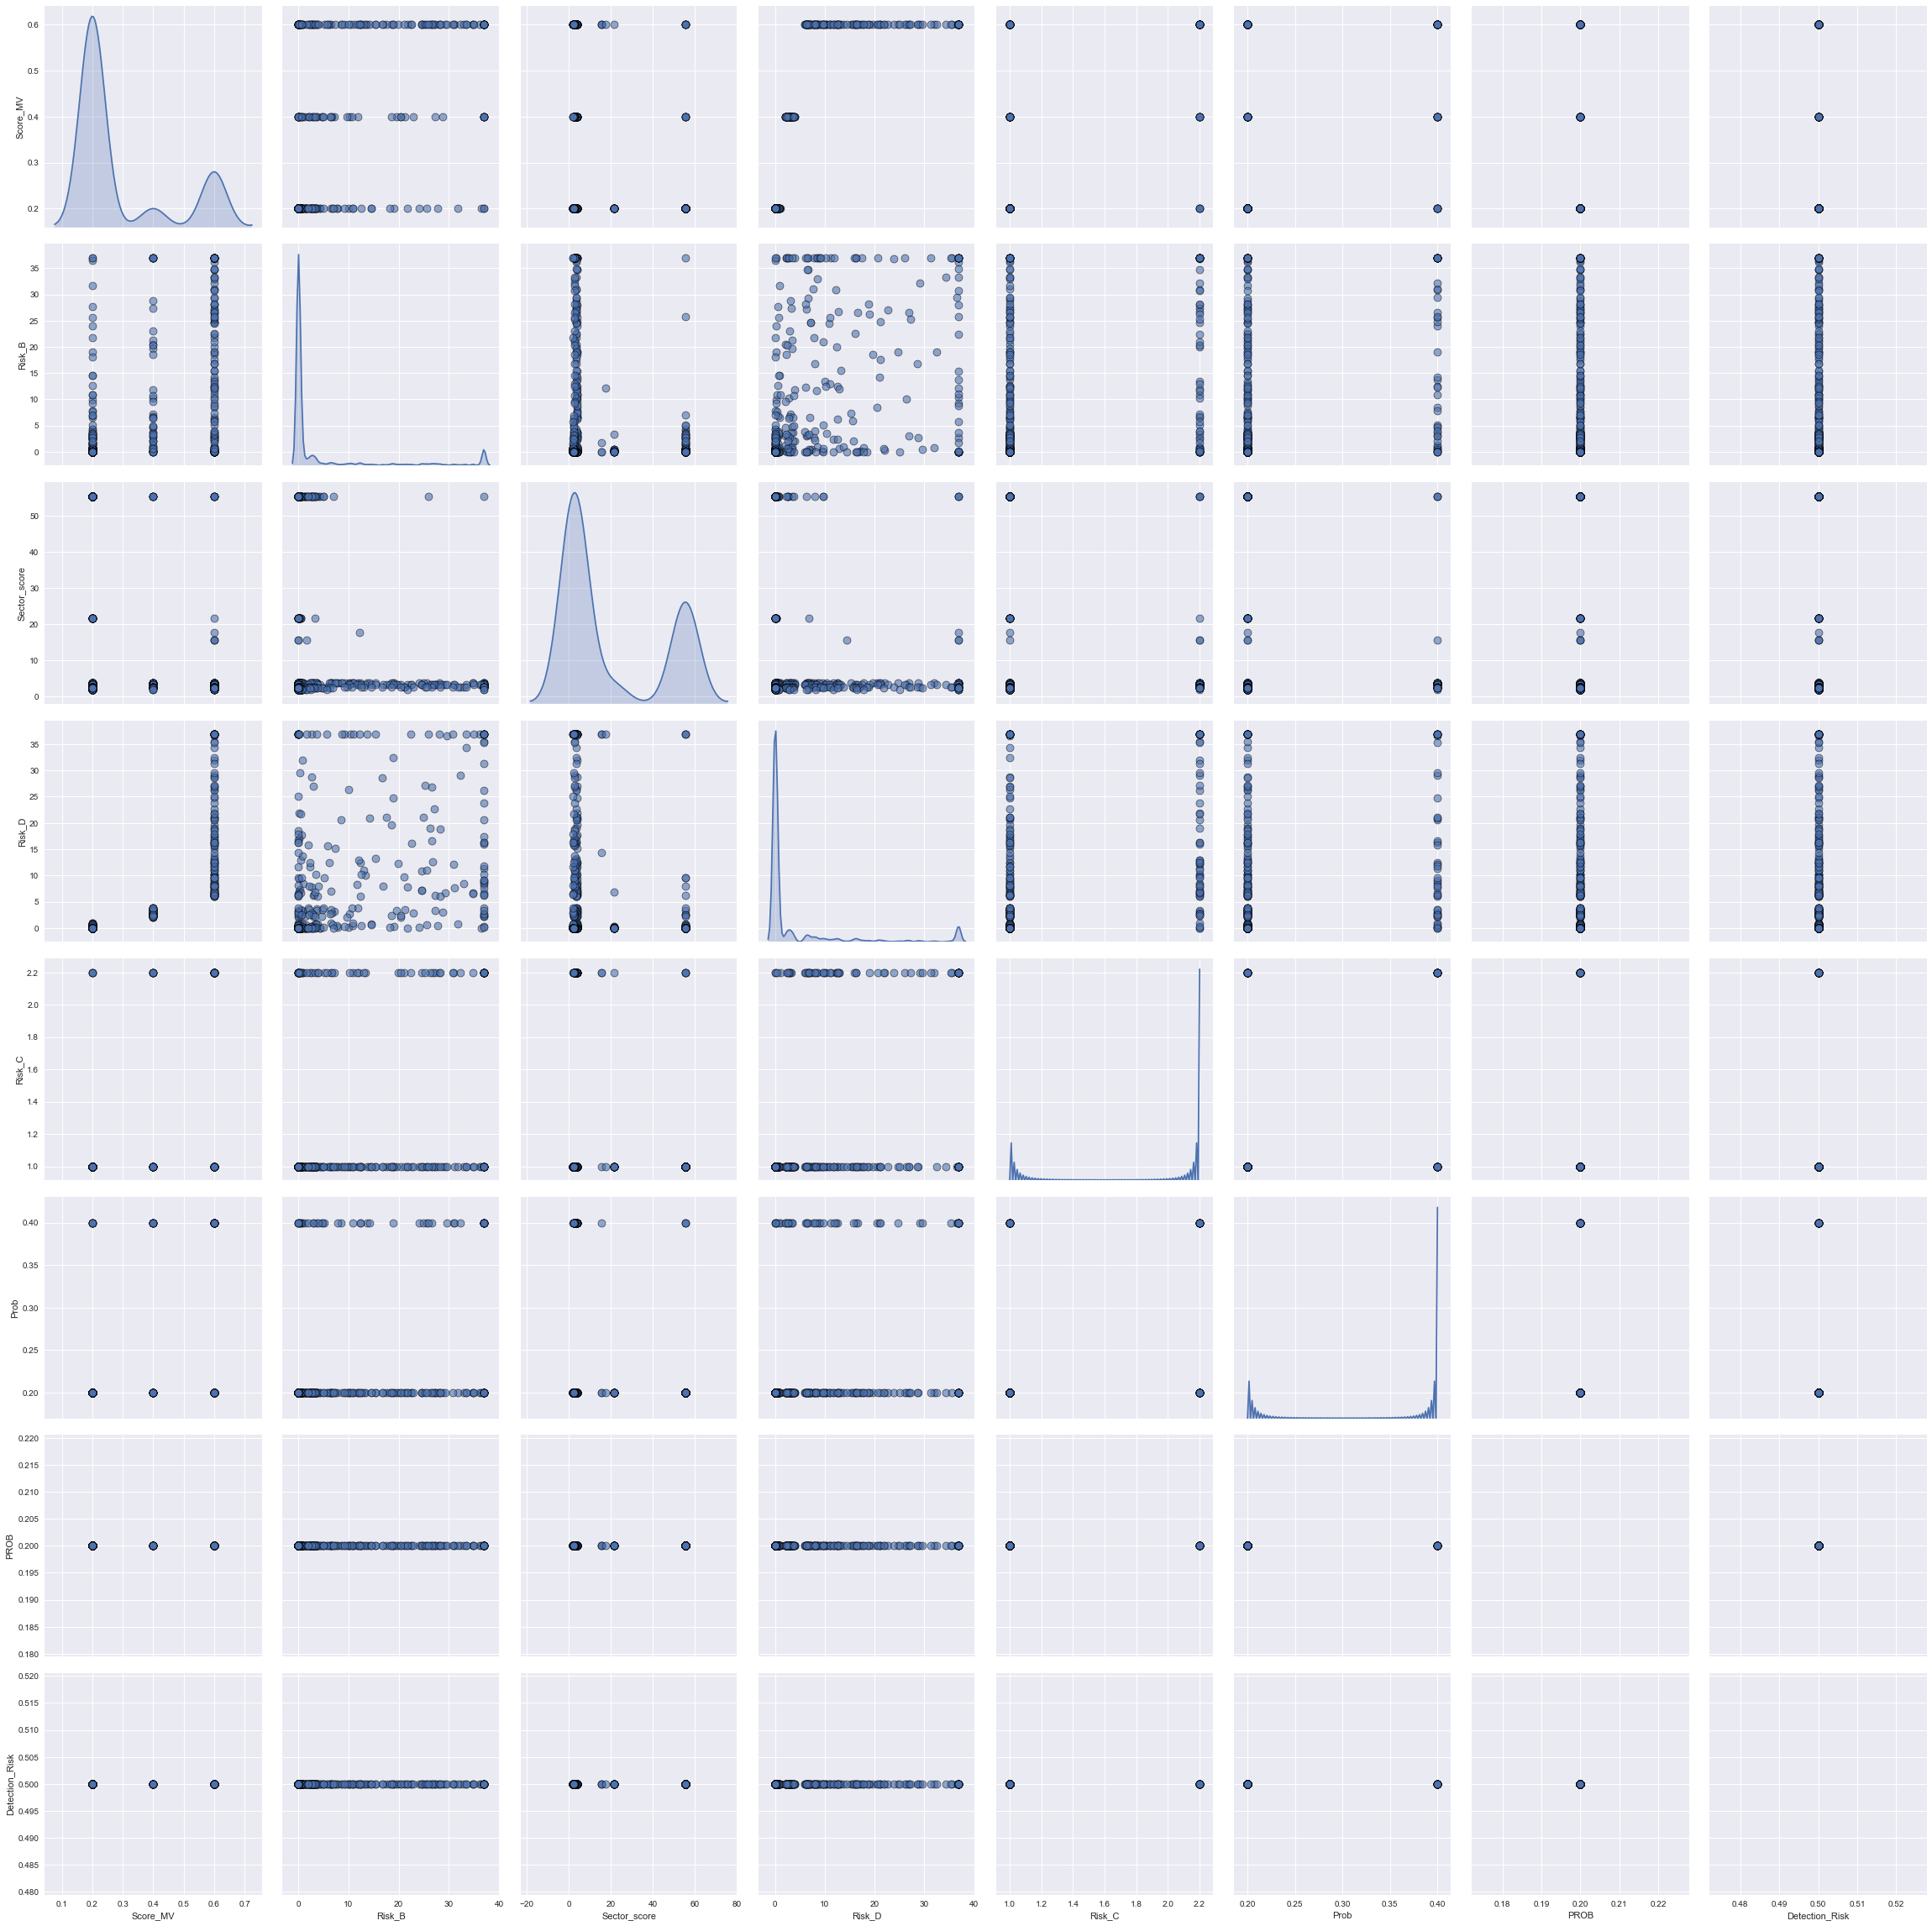

In [58]:
# Lets see the visualization of the relationship between the most correlated features and the response using scatterplots
sns.pairplot(A_R_sel[['Score_MV','Risk_B','Sector_score','Risk_D','Risk_C','Prob','PROB','Detection_Risk']],diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},size=4)

## Exploratory Data Analysis
Histogram of two Score_MV distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Score_MV')

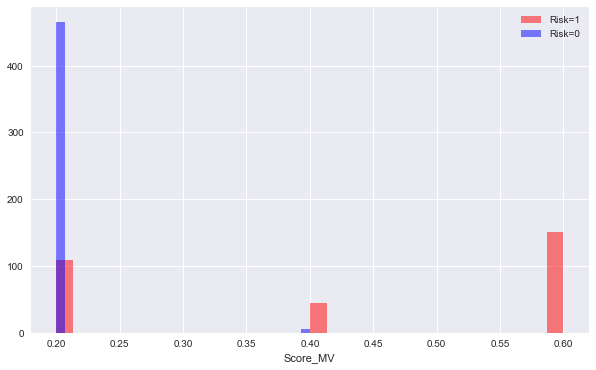

In [59]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Score_MV'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Score_MV'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Score_MV')

Histogram of two Risk_B distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Risk_B')

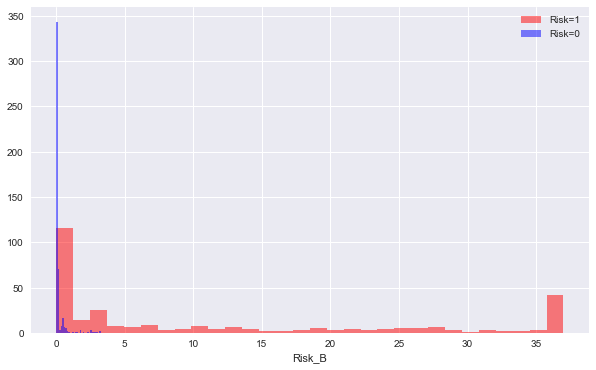

In [60]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Risk_B'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Risk_B'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Risk_B')

Histogram of two Sector_score distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Sector_score')

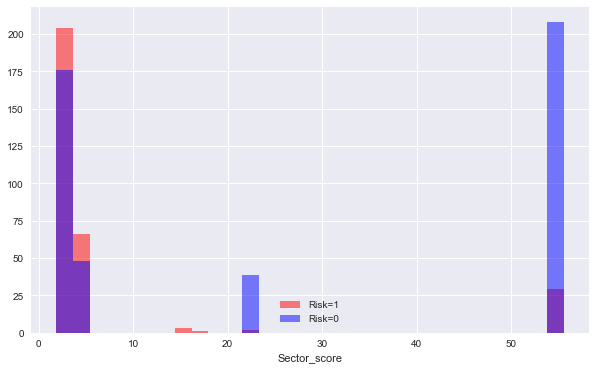

In [61]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Sector_score'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Sector_score'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Sector_score')

Histogram of two Risk_D distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Risk_D')

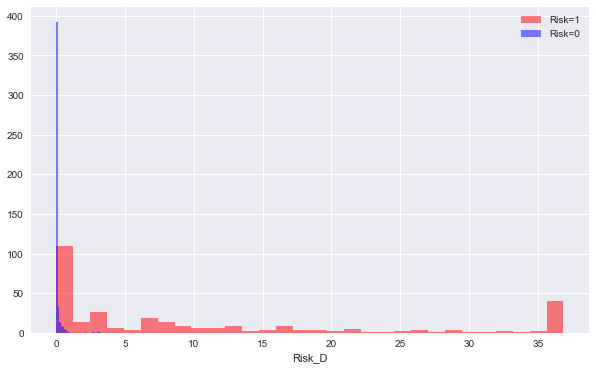

In [62]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Risk_D'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Risk_D'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Risk_D')

Histogram of two Risk_C distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Risk_C')

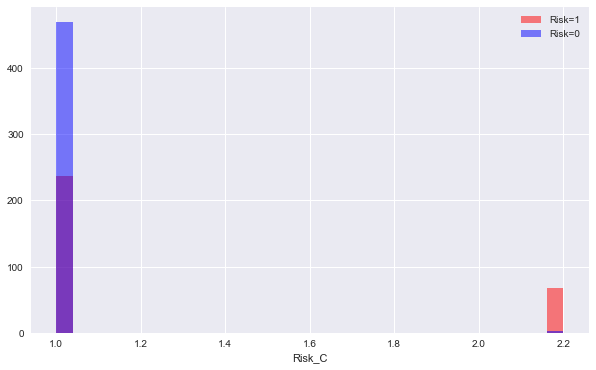

In [63]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Risk_C'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Risk_C'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Risk_C')


Histogram of two Prob distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Prob')

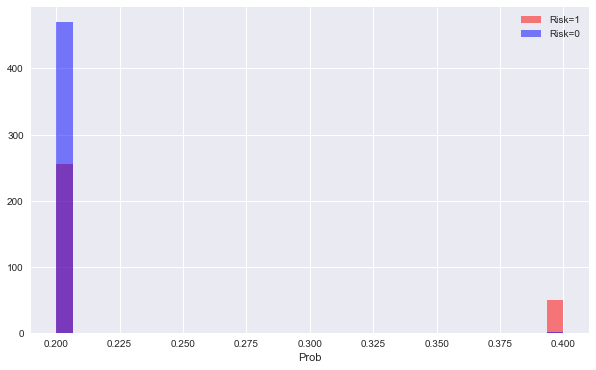

In [64]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Prob'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Prob'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Prob')

Histogram of two PROB distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'PROB')

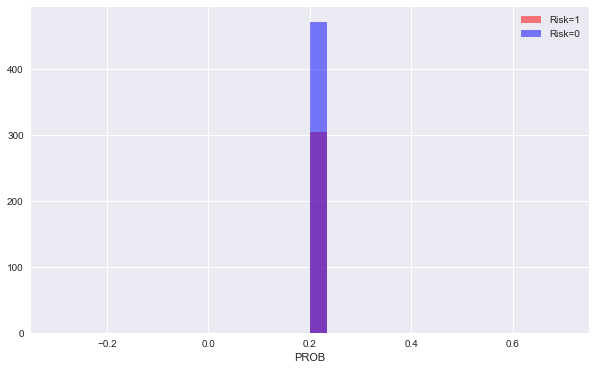

In [65]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['PROB'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['PROB'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('PROB')

Histogram of two Detection_Risk distributions on top of each other, one for each Risk outcome

Text(0.5, 0, 'Detection_Risk')

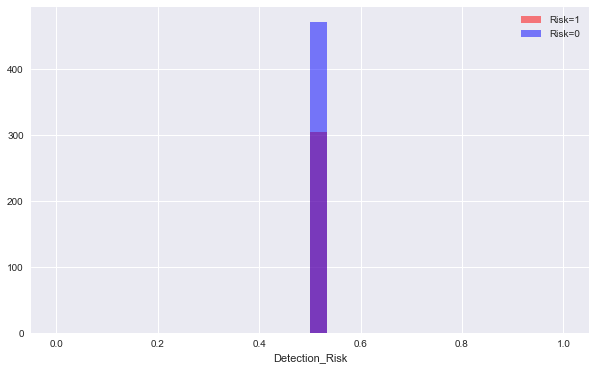

In [66]:
plt.figure(figsize=(10,6))
A_R_sel[A_R_sel['Risk']==1]['Detection_Risk'].hist(alpha=0.5,color='red',bins=30,label='Risk=1')
A_R_sel[A_R_sel['Risk']==0]['Detection_Risk'].hist(alpha=0.5,color='blue',bins=30,label='Risk=0')
plt.legend()
plt.xlabel('Detection_Risk')

#### Distribution of Proportion of customers with Normal and Risk through Pie Chart: 

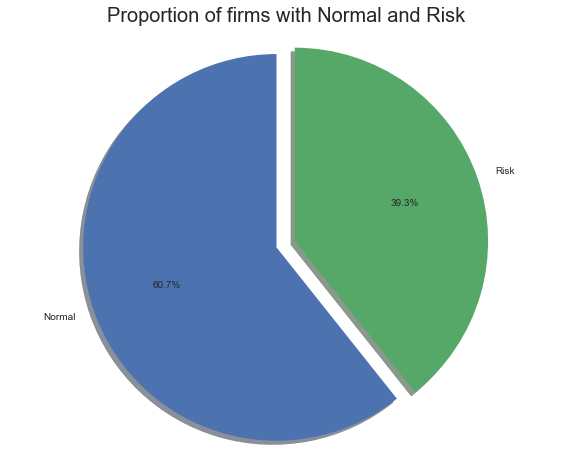

In [67]:
labels = 'Normal','Risk'
sizes = [A_R_sel.Risk[A_R_sel['Risk']==0].count(), A_R_sel.Risk[A_R_sel['Risk']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of firms with Normal and Risk", size = 20)
plt.show()

### Dropping Insignificant Variables:

In [68]:
features_selected=['Score_MV','Risk_B','Sector_score','Risk_D','Risk_C','Prob','PROB','Detection_Risk']
features_selected

['Score_MV',
 'Risk_B',
 'Sector_score',
 'Risk_D',
 'Risk_C',
 'Prob',
 'PROB',
 'Detection_Risk']

# Model Building:

In [69]:
#Split data into train x and train y

train_X, test_X, train_Y, test_Y = train_test_split(A_R_sel[features_selected], A_R_sel['Risk'], test_size = 0.3,
                                                   random_state = 123, stratify = A_R_sel["Risk"])

In [70]:
#size of data
print(train_X.shape)
print(test_X.shape)

(543, 8)
(233, 8)


In [71]:
train_Y.value_counts()/train_Y.shape[0]

0    0.607735
1    0.392265
Name: Risk, dtype: float64

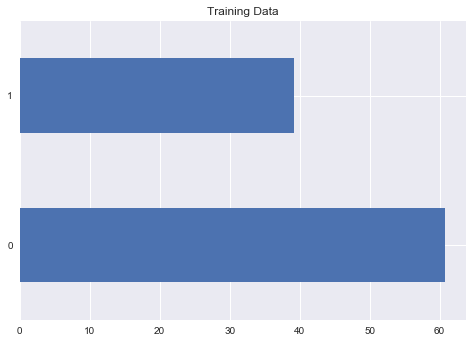

In [72]:
(train_Y.value_counts()/train_Y.shape[0] * 100).plot(kind = "barh")
plt.title("Training Data")
plt.show()

In [73]:
test_Y.value_counts()/test_Y.shape[0]

0    0.60515
1    0.39485
Name: Risk, dtype: float64

## Build Model Pipelines:

In [74]:
#declare hyperparameters dictionary

pipelines = {
    'logistic' : make_pipeline(LogisticRegression(random_state = 123)),
    'dt' : make_pipeline(DecisionTreeClassifier(random_state = 123))
}

In [75]:
#add ada boost, gradient boosting and XGBoost :
pipelines['ab'] = make_pipeline(AdaBoostClassifier(random_state=123))
pipelines['gb'] = make_pipeline(GradientBoostingClassifier(random_state=123))
pipelines['xgb'] = make_pipeline(XGBClassifier(random_state=123))
pipelines['mlp'] = make_pipeline(MLPClassifier(random_state=123))

### Declare Hyperparameters:

In [76]:
#getting the list of hyperparameters

pipelines['logistic'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [77]:
#logistic hyperparameters
logistic_hyperparameters = {
    'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__penalty' : ['l1', 'l2']
}

In [78]:
pipelines['dt'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [79]:
#decision hyperparameters
decision_hyperparameters = {
    'decisiontreeclassifier__max_features' : ['auto', 'sqrt', 'log2'],
    'decisiontreeclassifier__max_depth' : np.arange(3, 10),
    'decisiontreeclassifier__min_samples_split' : np.arange(2, 10),
    'decisiontreeclassifier__min_samples_leaf' : np.arange(1, 3)
}

In [80]:
decision_hyperparameters

{'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
 'decisiontreeclassifier__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
 'decisiontreeclassifier__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'decisiontreeclassifier__min_samples_leaf': array([1, 2])}

In [81]:
pipelines['ab'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'adaboostclassifier', 'adaboostclassifier__algorithm', 'adaboostclassifier__base_estimator', 'adaboostclassifier__learning_rate', 'adaboostclassifier__n_estimators', 'adaboostclassifier__random_state'])

In [82]:
#ada boost hyperparameters
ab_hyperparameters = {
    'adaboostclassifier__n_estimators' : [100, 200, 400, 600, 800],
    'adaboostclassifier__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3,1]
}

In [83]:
ab_hyperparameters

{'adaboostclassifier__n_estimators': [100, 200, 400, 600, 800],
 'adaboostclassifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1]}

In [84]:
pipelines['gb'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'gradientboostingclassifier', 'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', 'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', 'gradientboostingclassifier__max_depth', 'gradientboostingclassifier__max_features', 'gradientboostingclassifier__max_leaf_nodes', 'gradientboostingclassifier__min_impurity_decrease', 'gradientboostingclassifier__min_impurity_split', 'gradientboostingclassifier__min_samples_leaf', 'gradientboostingclassifier__min_samples_split', 'gradientboostingclassifier__min_weight_fraction_leaf', 'gradientboostingclassifier__n_estimators', 'gradientboostingclassifier__n_iter_no_change', 'gradientboostingclassifier__presort', 'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', 'gradientboostingclassifier__tol', 'gradientboostingclassifier__validation_fraction', 'gradientboostingclassifier__verbose', 'gradientboostingclassifier__warm_start'])

In [85]:
#Gradient Boosting hyperparameters
gb_hyperparameters={
    'gradientboostingclassifier__n_estimators':[100,500],
    'gradientboostingclassifier__max_depth':range(4,30),
    'gradientboostingclassifier__max_features':[3,4,5,6,7],
    'gradientboostingclassifier__min_samples_split':[50,100,150],
    'gradientboostingclassifier__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3]
}

In [86]:
gb_hyperparameters

{'gradientboostingclassifier__n_estimators': [100, 500],
 'gradientboostingclassifier__max_depth': range(4, 30),
 'gradientboostingclassifier__max_features': [3, 4, 5, 6, 7],
 'gradientboostingclassifier__min_samples_split': [50, 100, 150],
 'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]}

In [87]:
pipelines['xgb'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'xgbclassifier', 'xgbclassifier__base_score', 'xgbclassifier__booster', 'xgbclassifier__colsample_bylevel', 'xgbclassifier__colsample_bynode', 'xgbclassifier__colsample_bytree', 'xgbclassifier__gamma', 'xgbclassifier__learning_rate', 'xgbclassifier__max_delta_step', 'xgbclassifier__max_depth', 'xgbclassifier__min_child_weight', 'xgbclassifier__missing', 'xgbclassifier__n_estimators', 'xgbclassifier__n_jobs', 'xgbclassifier__nthread', 'xgbclassifier__objective', 'xgbclassifier__random_state', 'xgbclassifier__reg_alpha', 'xgbclassifier__reg_lambda', 'xgbclassifier__scale_pos_weight', 'xgbclassifier__seed', 'xgbclassifier__silent', 'xgbclassifier__subsample', 'xgbclassifier__verbosity'])

In [88]:
# Extreme Gradient Boosting hyperparameters 
xgb_hyperparameters = {
'xgbclassifier__colsample_bytree':[0.3, 0.4, 0.5 , 0.7],
'xgbclassifier__gamma':[0,0.03,0.1,0.3],
'xgbclassifier__min_child_weight':[1, 3, 5, 7 ],
'xgbclassifier__learning_rate':[0.01,0.10, 0.15, 0.20, 0.25],
'xgbclassifier__max_depth':[4, 5, 6, 8, 10, 12, 15],
'xgbclassifier__n_estimators':[100],
'xgbclassifier__reg_alpha':[1e-5, 1e-2,  0.75],
'xgbclassifier__reg_lambda':[1e-5, 1e-2, 0.45],
'xgbclassifier__subsample':[0.6,0.95]  
}

In [89]:
xgb_hyperparameters

{'xgbclassifier__colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'xgbclassifier__gamma': [0, 0.03, 0.1, 0.3],
 'xgbclassifier__min_child_weight': [1, 3, 5, 7],
 'xgbclassifier__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25],
 'xgbclassifier__max_depth': [4, 5, 6, 8, 10, 12, 15],
 'xgbclassifier__n_estimators': [100],
 'xgbclassifier__reg_alpha': [1e-05, 0.01, 0.75],
 'xgbclassifier__reg_lambda': [1e-05, 0.01, 0.45],
 'xgbclassifier__subsample': [0.6, 0.95]}

In [90]:
pipelines['mlp'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'mlpclassifier', 'mlpclassifier__activation', 'mlpclassifier__alpha', 'mlpclassifier__batch_size', 'mlpclassifier__beta_1', 'mlpclassifier__beta_2', 'mlpclassifier__early_stopping', 'mlpclassifier__epsilon', 'mlpclassifier__hidden_layer_sizes', 'mlpclassifier__learning_rate', 'mlpclassifier__learning_rate_init', 'mlpclassifier__max_iter', 'mlpclassifier__momentum', 'mlpclassifier__n_iter_no_change', 'mlpclassifier__nesterovs_momentum', 'mlpclassifier__power_t', 'mlpclassifier__random_state', 'mlpclassifier__shuffle', 'mlpclassifier__solver', 'mlpclassifier__tol', 'mlpclassifier__validation_fraction', 'mlpclassifier__verbose', 'mlpclassifier__warm_start'])

In [102]:
# Extreme Gradient Boosting hyperparameters 
mlp_hyperparameters = {
'mlpclassifier__hidden_layer_sizes':[(50,50,50), (50,100,50), (100,)],
'mlpclassifier__max_iter':[50,100,150,200],
'mlpclassifier__activation':['tanh','relu'],
'mlpclassifier__solver':['sgd','adam','lbfgs'],
'mlpclassifier__tol':[1e-4,1e-5,1e-6],
'mlpclassifier__learning_rate':['adaptive','constant'],
'mlpclassifier__alpha':[0.1,0.01,0.001,0.05],
'mlpclassifier__learning_rate_init':[0.1,0.01,0.001]  
}

In [103]:
hyperparameters = {
    'logistic' : logistic_hyperparameters,
    'dt' : decision_hyperparameters,
    'ab' : ab_hyperparameters,
    'gb' : gb_hyperparameters,
    'xgb': xgb_hyperparameters,
    'mlp': mlp_hyperparameters}

## Fit and Tune using Cross Validation

In [104]:
from sklearn.model_selection import StratifiedKFold

In [105]:
k = StratifiedKFold(n_splits=5,random_state=123)

In [106]:
#Create a empty dictionary called fitted models

fitted_models = {}

for name, pipeline in pipelines.items():
    
    #create a cross validation object from pipelines and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = k , n_jobs=5,return_train_score=True, verbose = 2,scoring="roc_auc")
    
    #fit model on train_X and train_Y
    model.fit(train_X, train_Y)
    
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    9.5s
[Parallel(n_jobs=5)]: Done  70 out of  70 | elapsed:    9.7s finished
C:\Users\disoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


logistic has been fitted.
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 1376 tasks      | elapsed:    4.8s
[Parallel(n_jobs=5)]: Done 1680 out of 1680 | elapsed:    5.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


dt has been fitted.
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    8.7s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:   48.1s finished


ab has been fitted.
Fitting 5 folds for each of 3900 candidates, totalling 19500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    7.0s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   17.3s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:   44.8s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  4.8min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  6.6min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed:  8.7min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 10.6min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed: 12.5min
[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 15.0min
[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 17.9min
[Parallel(n_jobs=5)]: Done 7928 tasks      | elapsed: 20.9min
[Parallel(n_jobs=5)]: Done 9103 tasks      | elapsed: 23.6min
[Parallel(n_jobs=5)]: Done 10358 tasks      | elapsed: 27.0mi

gb has been fitted.
Fitting 5 folds for each of 40320 candidates, totalling 201600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 294 tasks      | elapsed:    6.3s
[Parallel(n_jobs=5)]: Done 700 tasks      | elapsed:   14.9s
[Parallel(n_jobs=5)]: Done 1266 tasks      | elapsed:   27.4s
[Parallel(n_jobs=5)]: Done 1996 tasks      | elapsed:   43.5s
[Parallel(n_jobs=5)]: Done 2886 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 3940 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 5154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 6532 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 8070 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done 9772 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 11634 tasks      | elapsed:  4.1min
[Parallel(n_jobs=5)]: Done 13660 tasks      | elapsed:  4.8min
[Parallel(n_jobs=5)]: Done 15846 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done 18196 tasks      | elapsed:  6

xgb has been fitted.
Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.4s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   29.7s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  3.3min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  5.3min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  7.7min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  9.5min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed: 10.5min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 12.5min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed: 15.8min
[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 18.2min
[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 20.1min
[Parallel(n_jobs=5)]: Done 7928 tasks      | elapsed: 23.6min
[Parallel(n_jobs=5)]: Done 9103 tasks      | elapsed: 27.0min

mlp has been fitted.


## Evaluate models and Select Winner

In [107]:
##Here we are evaluating based on model accuracy
modelname = []
score = []

for name,model_built in fitted_models.items():
    if name == "ab":
        modelname.append("adaboost")
    elif name == "dt":
        modelname.append("decision tree")
    elif name == "gb":
        modelname.append("gradient boosting")
    elif name == "xgb":
        modelname.append("extreme gradient boosting")
    elif name == "mlp":
        modelname.append("multilayer perceptron")
    else:
        modelname.append(name)
    score.append(model_built.best_score_)
    print(name, model_built.best_score_)

logistic 0.9408879733625973
dt 0.9204322274153959
ab 0.9436187928735787
gb 0.9438027602617092
xgb 0.9468350471177146
mlp 0.947061008573279


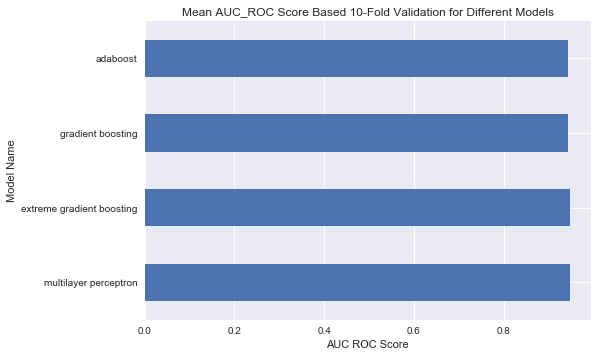

In [108]:
roc_auc_importance = pd.Series(score, index=modelname)
roc_auc_importance.nlargest(4).plot(kind='barh')

plt.title("Mean AUC_ROC Score Based 10-Fold Validation for Different Models")
plt.xlabel("AUC ROC Score")
plt.ylabel("Model Name")
plt.show()

MLPClassifier is giving better score for roc_auc metric.

In [110]:
fitted_models['mlp'].best_estimator_

Pipeline(memory=None,
         steps=[('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto',
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=(50, 50, 50),
                               learning_rate='adaptive', learning_rate_init=0.1,
                               max_iter=50, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=123, shuffle=True, solver='lbfgs',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [111]:
best_model = fitted_models['mlp'].best_estimator_.named_steps['mlpclassifier']

In [112]:
#Best parameters for XGB Classifier:

fitted_models['mlp'].best_params_

{'mlpclassifier__activation': 'tanh',
 'mlpclassifier__alpha': 0.01,
 'mlpclassifier__hidden_layer_sizes': (50, 50, 50),
 'mlpclassifier__learning_rate': 'adaptive',
 'mlpclassifier__learning_rate_init': 0.1,
 'mlpclassifier__max_iter': 50,
 'mlpclassifier__solver': 'lbfgs',
 'mlpclassifier__tol': 0.0001}

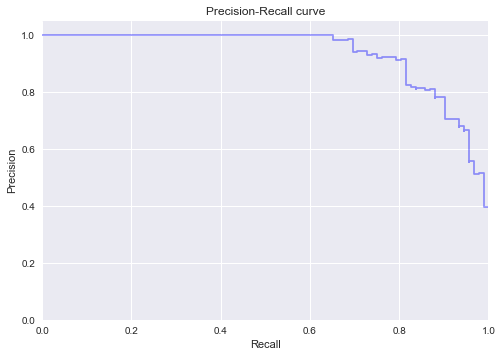

In [121]:
# Recall Precision Curve:
 
mlp_model = best_model
 
# Training the models
mlp_model.fit(train_X, train_Y)
y_pred = mlp_model.predict_proba(test_X)
precision, recall, thresholds = precision_recall_curve(test_Y, y_pred[:,1])
 
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

The precision-recall curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Threshold cutoff:  0.41372812034888284
Max F1-score at cut-off :  0.8620689655172414


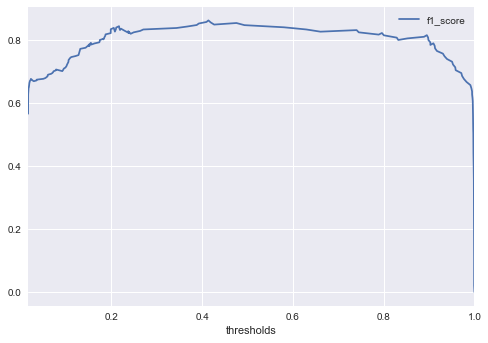

In [122]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

Once we get the optimal threshold, we can use it for test set probability predictions as a cutoff to predict class labels 0 and 1 for the final submission.

### Feature Importances:
Since MLP has no feature importances, I have used xgb to find out the most prominent features for the risk analysis:

In [178]:
fitted_models['xgb'].best_estimator_

Pipeline(memory=None,
         steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, gamma=0,
                               learning_rate=0.01, max_delta_step=0,
                               max_depth=4, min_child_weight=3, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=123,
                               reg_alpha=0.75, reg_lambda=0.45,
                               scale_pos_weight=1, seed=None, silent=None,
                               subsample=0.95, verbosity=1))],
         verbose=False)

In [179]:
xgb_model = fitted_models['xgb'].best_estimator_.named_steps['xgbclassifier']

In [181]:
#best parameters for xgb regression

fitted_models['xgb'].best_params_

{'xgbclassifier__colsample_bytree': 0.7,
 'xgbclassifier__gamma': 0,
 'xgbclassifier__learning_rate': 0.01,
 'xgbclassifier__max_depth': 4,
 'xgbclassifier__min_child_weight': 3,
 'xgbclassifier__n_estimators': 100,
 'xgbclassifier__reg_alpha': 0.75,
 'xgbclassifier__reg_lambda': 0.45,
 'xgbclassifier__subsample': 0.95}

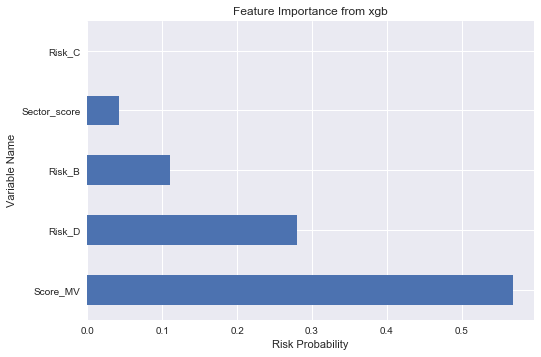

In [182]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=train_X.columns)
feat_importances.nlargest(5).plot(kind='barh')

plt.title("Feature Importance from xgb")
plt.xlabel("Risk Probability")
plt.ylabel("Variable Name")
plt.show()

Based on xgb model, We can see that Score_MV is the most prominent predictor for the fraud detection of the firm.

## Making Predictions

In [124]:
from sklearn import metrics

In [125]:
#Predictions on Train data

mlp_train_predict = pd.DataFrame({'actual' : train_Y, 'predicted' : best_model.predict(train_X)})
mlp_train_predict.head()

,actual,predicted
167,1,1
651,0,0
94,1,1
556,0,0
28,0,0


In [126]:
#metrics - accuracy
metrics.accuracy_score(mlp_train_predict.actual, mlp_train_predict.predicted)

0.8950276243093923

In [127]:
##Confusion Matrix for training data

mlp_train_cm = metrics.confusion_matrix(mlp_train_predict.actual, mlp_train_predict.predicted, labels=[1, 0])
mlp_train_cm

array([[165,  48],
       [  9, 321]], dtype=int64)

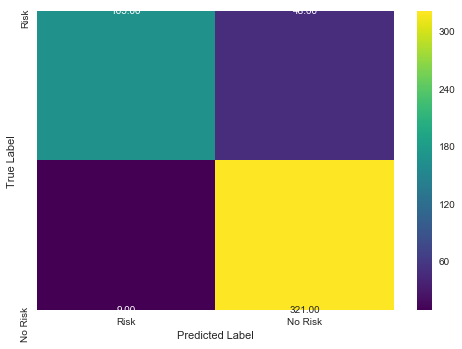

In [128]:
sns.heatmap(mlp_train_cm,annot=True, fmt=".2f", xticklabels=['Risk', 'No Risk'],cmap="viridis", yticklabels=['Risk', 'No Risk'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

In [129]:
# Recall-Precesion Curve:


## Model Validation - Test Data

In [130]:
mlp_test_predict = pd.DataFrame({'actual' : test_Y, "predicted" : best_model.predict(test_X)})
mlp_test_predict.head()

,actual,predicted
731,0,0
508,0,0
717,1,0
625,0,0
676,0,0


In [131]:
#Metrics - Accuracy
metrics.accuracy_score(mlp_test_predict.actual, mlp_test_predict.predicted)

0.8841201716738197

In [132]:
mlp_test_cm = metrics.confusion_matrix(mlp_test_predict.actual, mlp_test_predict.predicted,labels=[1,0])
mlp_test_cm

array([[ 71,  21],
       [  6, 135]], dtype=int64)

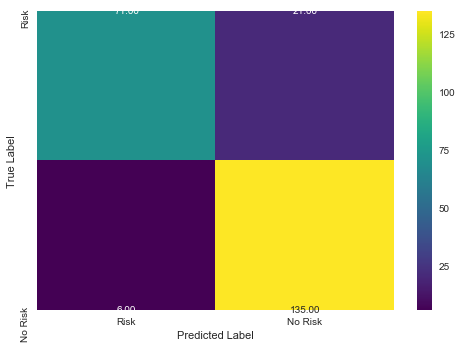

In [133]:
##Heat Map
sns.heatmap(mlp_test_cm,cmap='viridis',annot=True, fmt=".2f", xticklabels=["Risk", "No Risk"], yticklabels=["Risk", "No Risk"])

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [134]:
##Predicting Probability of Risk

predict_prob_df = pd.DataFrame(best_model.predict_proba(test_X))
predict_prob_df.head()

,0,1
0,0.949870,0.050130
1,0.940462,0.059538
2,0.977291,0.022709
3,0.981831,0.018169
4,0.964302,0.035698


In [135]:
##Merging Prob and predicted values
mlp_test_predict = pd.concat([mlp_test_predict.reset_index(), predict_prob_df], axis=1)
mlp_test_predict.columns = ['index', 'actual', 'predicted', 'Risk_prob_0', 'Risk_prob_1']
mlp_test_predict.head()

,index,actual,predicted,Risk_prob_0,Risk_prob_1
0,731,0,0,0.949870,0.050130
1,508,0,0,0.940462,0.059538
2,717,1,0,0.977291,0.022709
3,625,0,0,0.981831,0.018169
4,676,0,0,0.964302,0.035698


In [136]:
##Calculate auc roc score
auc_score_cal = metrics.roc_auc_score(mlp_test_predict.actual, mlp_test_predict.Risk_prob_1)
round(auc_score_cal,4)

0.9404

In [137]:
plt.style.use('seaborn')

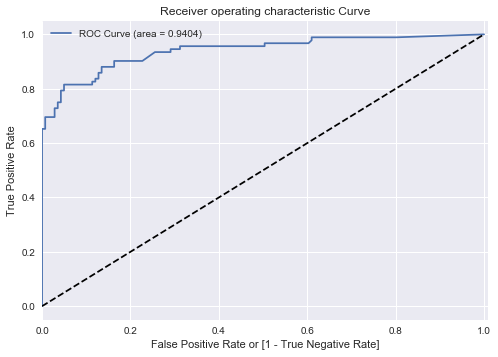

In [138]:
##Draw ROC Curve

fpr, tpr ,thresholds = metrics.roc_curve(mlp_test_predict.actual, mlp_test_predict.Risk_prob_1,drop_intermediate=False)

plt.plot(fpr, tpr,label = 'ROC Curve (area = %0.4f)' %auc_score_cal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.01])


plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="best")
plt.show()

In [139]:
print(metrics.classification_report(mlp_test_predict.actual, mlp_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       141
           1       0.92      0.77      0.84        92

    accuracy                           0.88       233
   macro avg       0.89      0.86      0.87       233
weighted avg       0.89      0.88      0.88       233



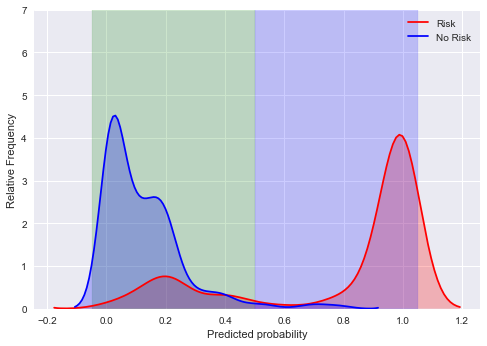

In [140]:
y_pred_prob = best_model.predict_proba(train_X)[:,1]
ypp = pd.DataFrame(data = y_pred_prob, columns = ['predicted'])
ypp['Risk'] = train_Y.values

ypp1 = ypp[ypp.Risk == 1]
ypp0 = ypp[ypp.Risk == 0]
ax = sns.kdeplot(ypp1.predicted, shade=True, color="r", label = 'Risk')
plt.fill_between([-0.05,0.5], 0, 10, color = 'g', alpha = 0.2)
plt.fill_between([0.5,1.05], 0, 10, color = 'b', alpha = 0.2)
plt.ylim(0, 7)
sns.kdeplot(ypp0.predicted, shade=True, color="b", ax = ax, label = 'No Risk')
plt.xlabel('Predicted probability')
plt.ylabel('Relative Frequency')
plt.show()

## Creating Churn Bands - Business Insights
Creating the segements based on customer probabilty of churn

In [141]:
#predicting the Risk on whole data

risk =  A_R[features_selected]
risk

,Score_MV,Risk_B,Sector_score,Risk_D,Risk_C,Prob,PROB,Detection_Risk
0,0.2,0.500,3.89,0.676,1.0,0.2,0.2,0.5
1,0.2,0.966,3.89,0.188,1.0,0.2,0.2,0.5
2,0.2,0.046,3.89,0.000,1.0,0.2,0.2,0.5
3,0.6,6.480,3.89,7.050,2.2,0.2,0.2,0.5
4,0.2,0.016,3.89,0.000,1.0,0.2,0.2,0.5
...,...,...,...,...,...,...,...,...
771,0.2,0.080,55.57,0.000,1.0,0.2,0.2,0.5
772,0.2,0.074,55.57,0.000,1.0,0.2,0.2,0.5
773,0.2,0.008,55.57,0.000,1.0,0.2,0.2,0.5
774,0.2,0.000,55.57,0.000,1.0,0.2,0.2,0.5


In [142]:
risk["Prob_true"] = pd.DataFrame(best_model.predict_proba(risk))[1]

C:\Users\disoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
risk["Risk"] = A_R[["Risk"]]

C:\Users\disoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
risk.head()

,Score_MV,Risk_B,Sector_score,Risk_D,Risk_C,Prob,PROB,Detection_Risk,Prob_true,Risk
0,0.2,0.500,3.89,0.676,1.0,0.2,0.2,0.5,0.364828,1
1,0.2,0.966,3.89,0.188,1.0,0.2,0.2,0.5,0.385913,0
2,0.2,0.046,3.89,0.000,1.0,0.2,0.2,0.5,0.098865,0
3,0.6,6.480,3.89,7.050,2.2,0.2,0.2,0.5,0.988841,1
4,0.2,0.016,3.89,0.000,1.0,0.2,0.2,0.5,0.094235,0


In [145]:
#filtering the active firms

risk_active = risk.loc[risk["Risk"]==1,:]

### CREATING BANDS FOR PROBABILITY OF RISK 
#### 0.0 - 0.4    - LOW_RISK_PROBABILITY
#### >0.4 – 0.5  - MED_RISK_PROBABILITY
#### >0.5        - HIGH_RISK_PROBABILITY

In [146]:
def risktype(prediction_of_actve_df):
    if ((prediction_of_actve_df.Prob_true  >= 0.0) & (prediction_of_actve_df.Prob_true < 0.4)):
        return 'LOW_RISK_PROBABILITY'
    elif ((prediction_of_actve_df.Prob_true  >= 0.4) & (prediction_of_actve_df.Prob_true <= 0.5)):
        return 'MED_RISK_PROBABILITY'
    else:
        return 'HIGH_RISK_PROBABILITY'

In [147]:
risk_active["RISK_BAND"] = risk_active.apply(risktype, axis=1)

C:\Users\disoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


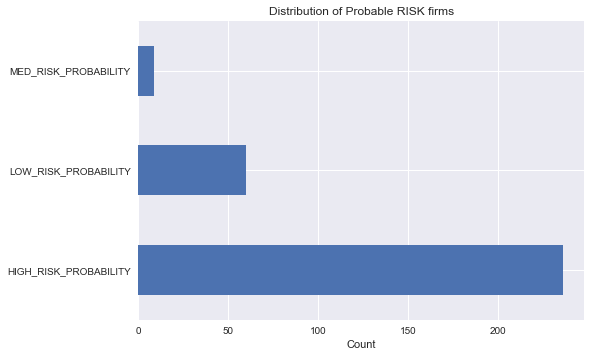

In [148]:
risk_active.RISK_BAND.value_counts().plot(kind = "barh")
plt.title("Distribution of Probable RISK firms")

plt.xlabel("Count")
plt.show()

#### RECOMMENDATIONS:
For firms with High Risk probabilities will require an immediate call to understand their grievances/complains, and issues. May be a new relationship manager will be helpful to understand their issues in terms of payment, language and complaints. 
For firms with Medium Risk probabilities may require souvenirs for their time with the service provider. Keep in touch with call and do monitor their grievances and complains for better contribution.

## Model Deployment

Finally, save the winning model.
We need to save your prediction models to file, and then restore them in order to reuse your previous work to: test your model on new data, compare multiple models, or anything else.
Pickle is the standard way of serializing objects in Python.Pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
Later you can load this file to deserialize your model and use it to make new predictions.

In [174]:
import pickle

#### Let's save the winning xgb Model object into a pickle file.

In [175]:
final_model='final_model.pkl'
with open('final_model', 'wb') as file:
    pickle.dump(best_model, file)

In [176]:
with open(final_model,'rb') as file:
    pickle_model_mlp=pickle.load(file)

In [177]:
pickle_model_mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              learning_rate_init=0.1, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=123, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)